The Presence of Heart Disease 

Heart disease is a leading cause of death in the world. Risk of heart disease can be influenced by many factors such as blood pressure, cholesterol, age, and sex. 


The question we will try to answer in this project is as follows:

What is the presence of heart disease, when given the age, chest pain type and serum cholesterol of an individual?
 
 
This dataset shows information about several individuals that could contribute to heart disease, like blood pressure, chest pain, age, sex, blood sugar, heart rate, e.t.c, and whether they do or do not have heart disease. The goal of this database is to determine the presence of heart disease in a patient. This goal is represented by the POHD field, which refers to the presence of heart disease in an individual. It is an integer valued from 0 (no presence) to 4. Experiments with this database have focused on distinguishing presence of heart disease (a value from 1 through 4) from absence (0). In this database, sex is represented by integer values, with 0 representing female and 1 representing male. The serum_cholestoral field represents serum cholesterol in mg/dl. The chest_pain_type field is represented by integer values ranging from 1-4. A value of 1 indicates typical angina, 2 is atypical angina, 3 is non-anginal pain, and 4 is asymptomatic. 


In [1]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
cleavland_heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
    col_names= c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD"))
cleavland_heart_disease_data

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  serum_cholestoral = col_double(),
  fasting_blood_sugar = col_double(),
  resting_electrocardiographic_results = col_double(),
  maximum_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  POHD = col_double()
)



Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


The data has now been read into R.

In [3]:
heart_disease_data <- cleavland_heart_disease_data %>%
                    select(Age, chest_pain_type, serum_cholestoral, POHD, resting_blood_pressure) %>%
                    mutate(POHD = as_factor(POHD))
heart_disease_data

Age,chest_pain_type,serum_cholestoral,POHD,resting_blood_pressure
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
63,1,233,0,145
67,4,286,2,160
67,4,229,1,120
⋮,⋮,⋮,⋮,⋮
57,4,131,3,130
57,2,236,1,130
38,3,175,0,138


We have selected for desired columns. The data has been cleaned and wrangled into a tidy format.

In [4]:
#seperate into training and testing data
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data, prop = 0.70, strata = POHD)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train
heart_disease_test

Age,chest_pain_type,serum_cholestoral,POHD,resting_blood_pressure
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
63,1,233,0,145
67,4,229,1,120
62,4,268,3,140
⋮,⋮,⋮,⋮,⋮
57,4,131,3,130
57,2,236,1,130
38,3,175,0,138


Age,chest_pain_type,serum_cholestoral,POHD,resting_blood_pressure
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
67,4,286,2,160
37,3,250,0,130
41,2,204,0,130
⋮,⋮,⋮,⋮,⋮
67,3,212,1,152
63,4,197,1,124
59,4,176,3,164


The data has been seperated into training and testing data.

In [5]:
#useful Tables 
summerized_POHD <- heart_disease_train %>%
    group_by(POHD) %>%
    summarize("Number of variable"= n())

mean_varaibles <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestoral),
                           "Mean Cheast Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure)) 
summerized_POHD
mean_varaibles



`summarise()` ungrouping output (override with `.groups` argument)



POHD,Number of variable
<fct>,<int>
0,114
1,38
2,25
3,24
4,12


Mean Age,Mean serum cholestoral,Mean Cheast Pain Type,Mean Resting Blood Pressure
<dbl>,<dbl>,<dbl>,<dbl>
54.67606,246.216,3.220657,132.169


We have created two tables. The first shows the number of rows that correspond to POHD values of 0 through 4. The second shows the mean values of our selected values. 

In [6]:
#scaled Data 
heart_disease_recipe <- recipe(POHD ~ Age + serum_cholestoral + chest_pain_type + resting_blood_pressure , data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 


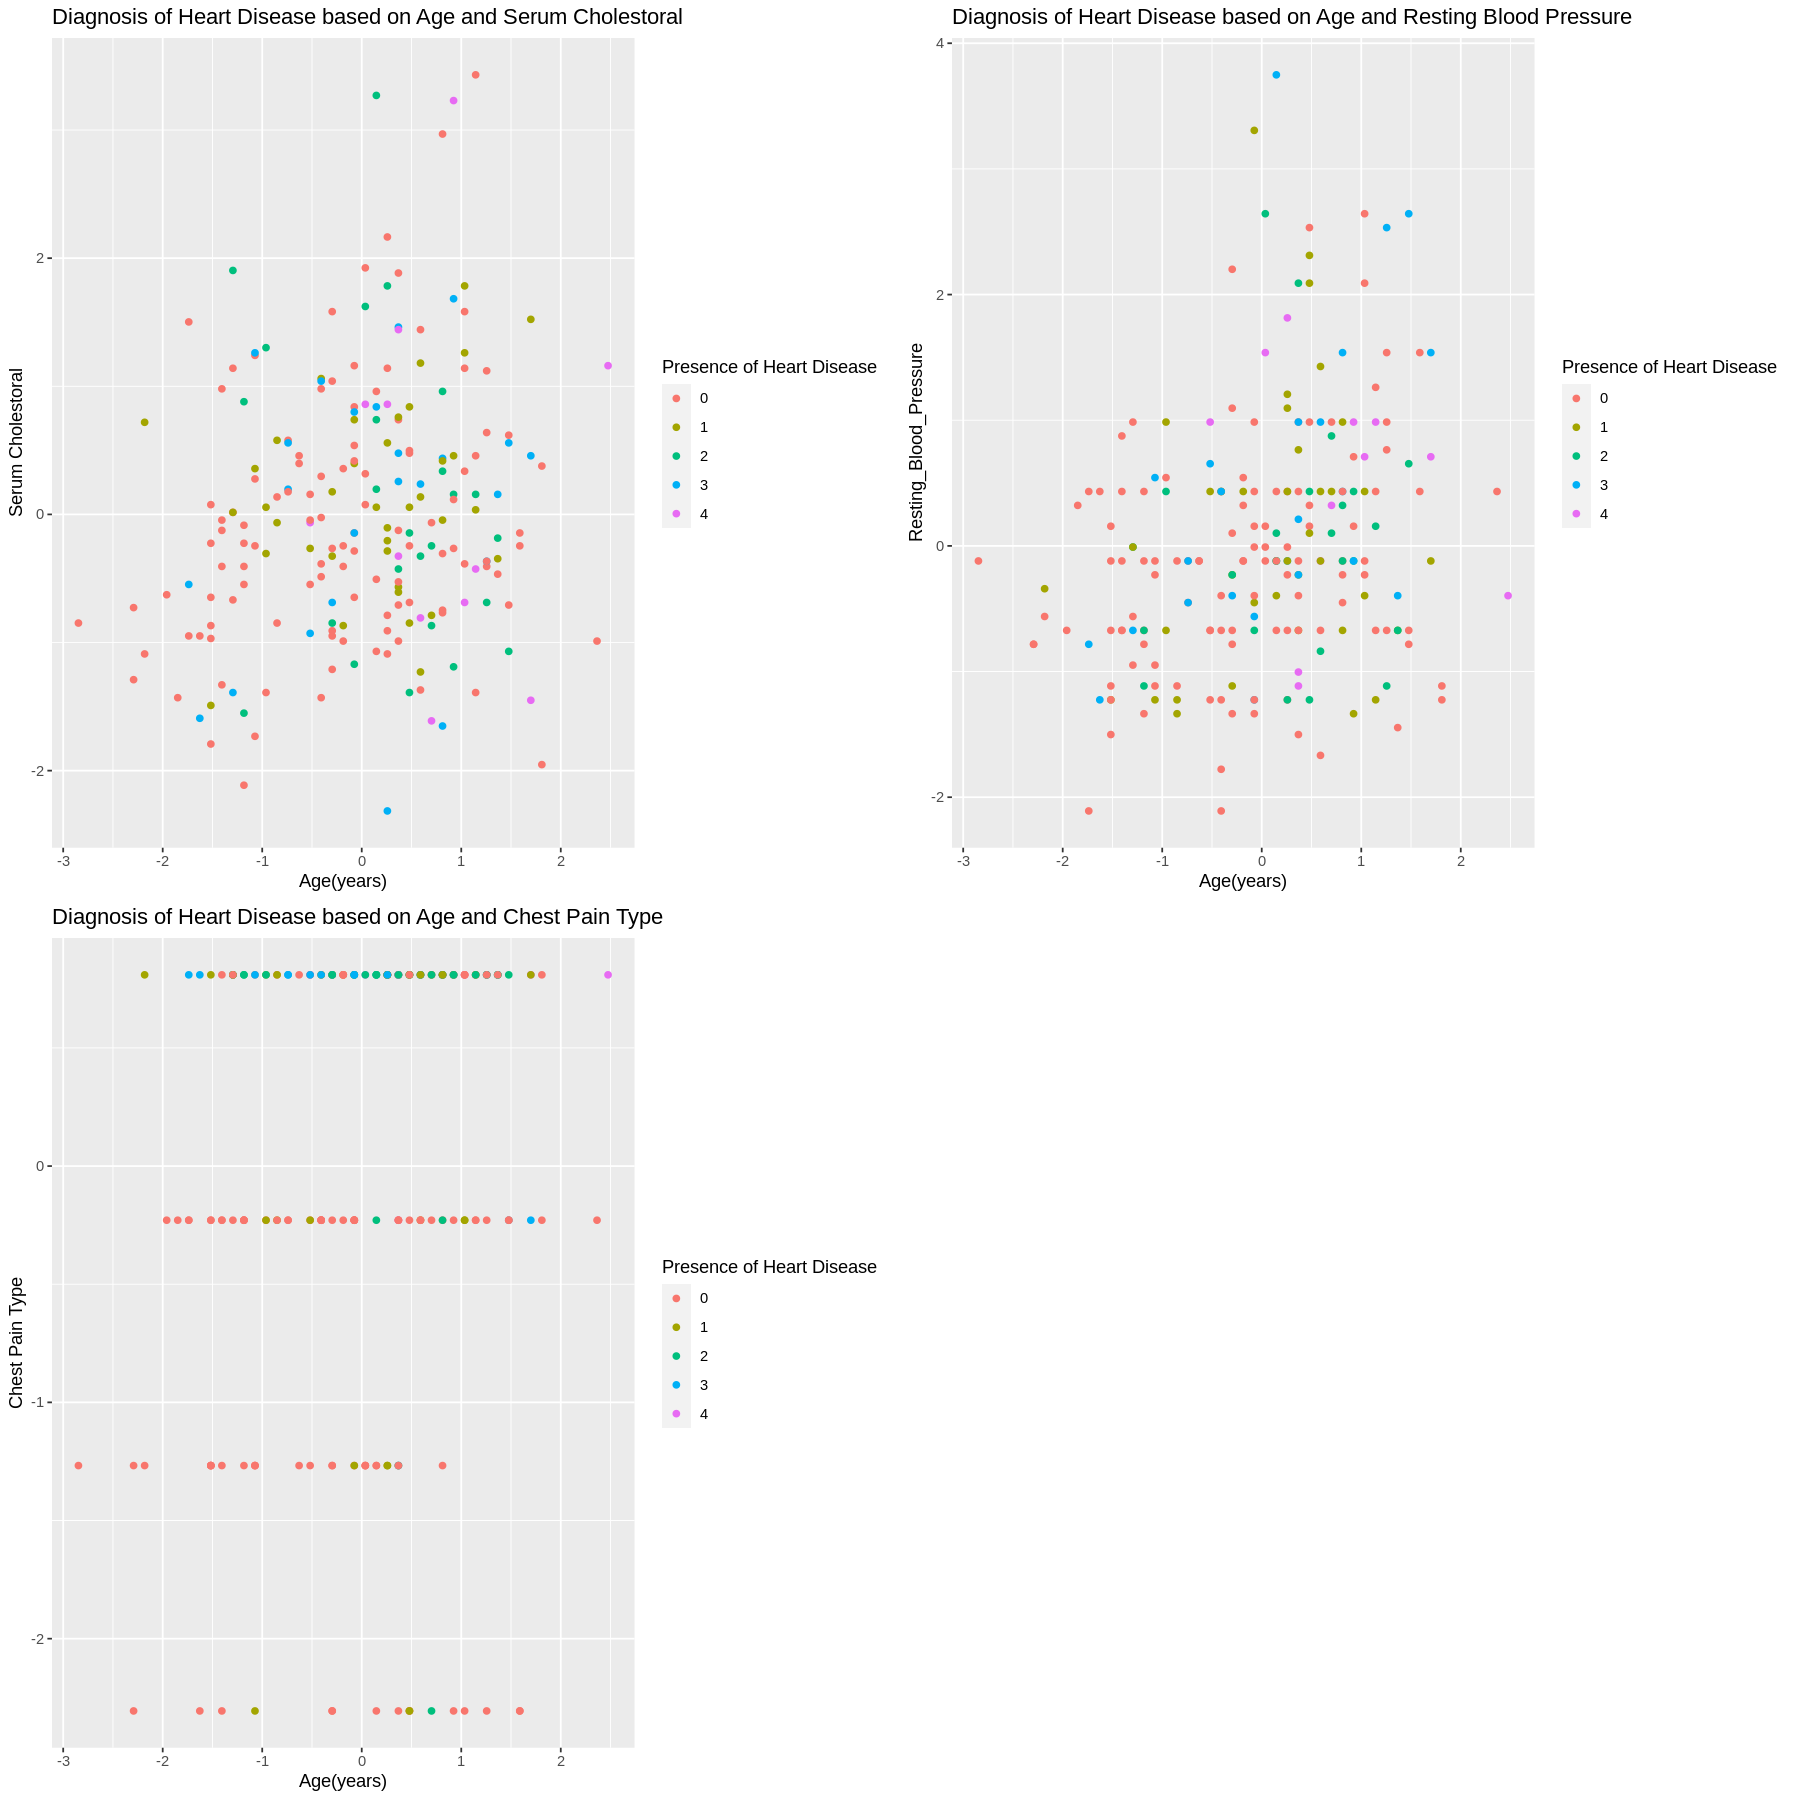

In [7]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot_1 <- heart_disease_scaled %>%
    ggplot (aes(x=Age, y=serum_cholestoral, colour= POHD)) +
    geom_point() +
    labs(x= "Age(years)", y= "Serum Cholestoral", colour = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Serum Cholestoral" )


plot_2 <- heart_disease_scaled %>%
    ggplot (aes(x=Age, y=resting_blood_pressure, colour= POHD)) +
    geom_point() +
    labs(x= "Age(years)", y= "Resting_Blood_Pressure", colour = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure" )

plot_3 <- heart_disease_scaled %>%
    ggplot (aes(x=Age, y=chest_pain_type, colour= POHD)) +
    geom_point() +
    labs(x= "Age(years)", y= "Chest Pain Type", colour = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Chest Pain Type" )

plot_grid(plot_1, plot_2, plot_3)

The plots above show relationships between our predictors. The predictor values have been scaled to ensure that all observations will be on a comparable scale. 